In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd


def load_object(path: str):
    try:
        image = Image.open(path)
        image = image.convert('L')
        image.resize((28, 28))
        return np.array(image).reshape(-1)
    except Exception as e:
        print(f"load_object exception: {e}")
        return None


def display_object(path: str):
    print(path)
    plt.imshow(Image.fromarray(load_object(path).reshape(28, 28)).convert('RGB'))


def display_first_objects(path: str):
    for dirname in os.listdir(path):
        dirpath = os.path.join(path, dirname)
        if not os.path.isdir(dirpath):
            continue

        for filename in os.listdir(dirpath):
            filepath = os.path.join(dirpath, filename)
            display_object(filepath)
            break

        plt.axis("off")
        plt.show()

data/letters\A\MDEtMDEtMDAudHRm.png


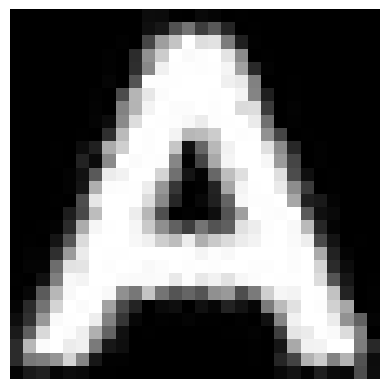

data/letters\B\MDEtMDEtMDAudHRm.png


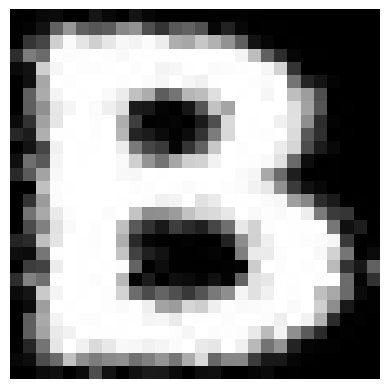

data/letters\C\MDEtMDEtMDAudHRm.png


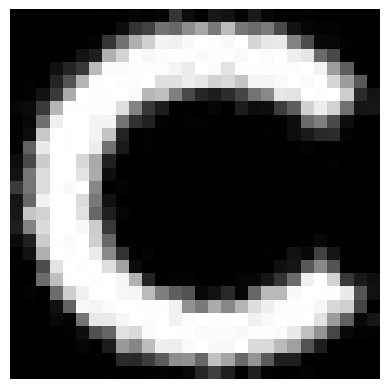

data/letters\D\MDEtMDEtMDAudHRm.png


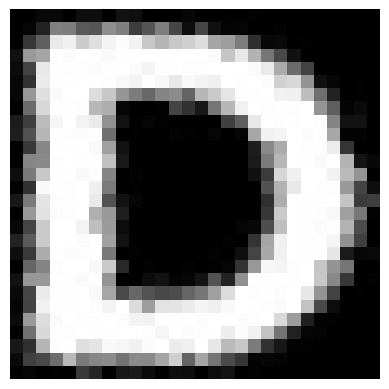

data/letters\E\MDEtMDEtMDAudHRm.png


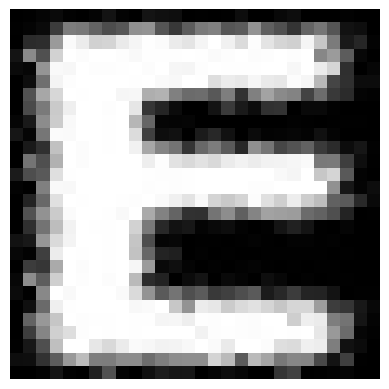

data/letters\F\MDEtMDEtMDAudHRm.png


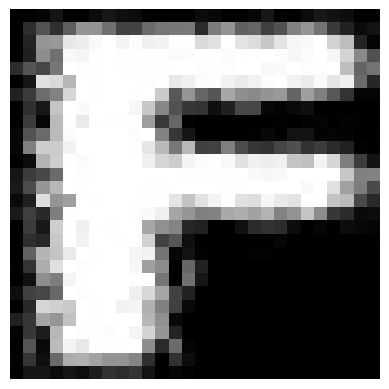

data/letters\G\MDEtMDEtMDAudHRm.png


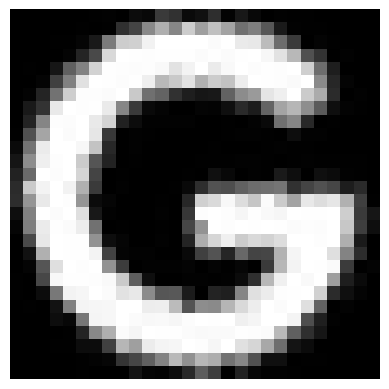

data/letters\H\MDEtMDEtMDAudHRm.png


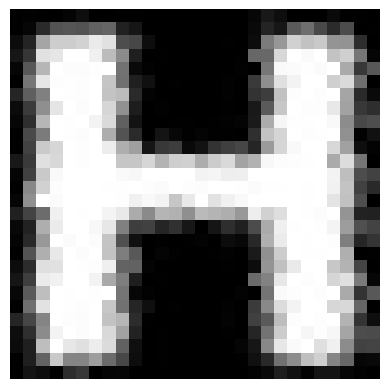

data/letters\I\MDEtMDEtMDAudHRm.png


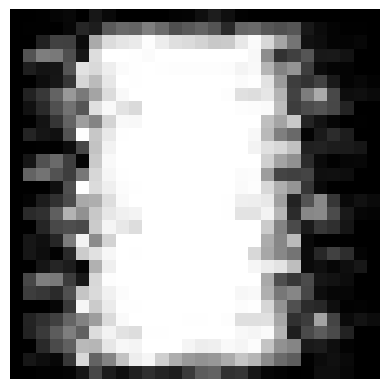

data/letters\J\MDEtMDEtMDAudHRm.png


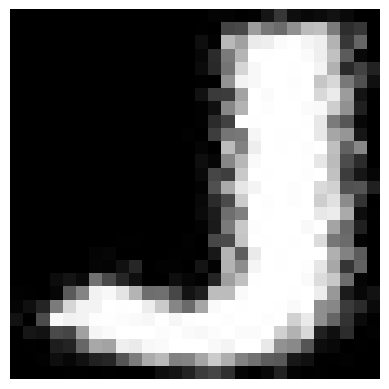

In [3]:
display_first_objects('data/letters')

In [4]:
TARGET_LABELS = ['target']
FEATURE_LABELS = ['path']
PIXEL_FEATURE_LABELS = []


def load_data(path: str):
    rows = []
    for dirname in os.listdir(path):
        dirpath = os.path.join(path, dirname)
        if not os.path.isdir(dirpath):
            continue

        objects = (
            {'target': dirname, 'data': load_object(os.path.join(dirpath, file)), 'path': os.path.join(dirpath, file)}
            for file in os.listdir(dirpath)
            if os.path.isfile(os.path.join(dirpath, file)) and os.path.getsize(os.path.join(dirpath, file)) > 0
        )
        rows.extend(objects)

    frame = pd.DataFrame(rows).dropna()
    flattened_data = np.stack(frame['data'].values)
    global PIXEL_FEATURE_LABELS
    PIXEL_FEATURE_LABELS = [f'data_pixel_{i}' for i in range(flattened_data.shape[1])]
    flattened_df = pd.DataFrame(flattened_data, columns=PIXEL_FEATURE_LABELS)
    result = pd.concat([frame[TARGET_LABELS + FEATURE_LABELS], flattened_df], axis=1)
    return result.dropna()

In [5]:
# Task 2
df = load_data("data/letters")
df.groupby('target').size()

target
A    1872
B    1873
C    1873
D    1873
E    1873
F    1872
G    1872
H    1872
I    1872
J    1872
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split


def split_data(data, train_size=0.6, val_size=0.2, test_size=0.2):
    assert train_size + val_size + test_size == 1, "The sum of train_size, val_size, and test_size must be 1"

    X_tv, X_test, y_tv, y_test = train_test_split(data[FEATURE_LABELS + PIXEL_FEATURE_LABELS], data[TARGET_LABELS], test_size=test_size, random_state=42)

    val_size_relative = val_size / (train_size + val_size)
    X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=val_size_relative, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [14]:
# Task 4. Drop duplicates
df.drop_duplicates(subset=PIXEL_FEATURE_LABELS)

,target,path,data_pixel_0,data_pixel_1,data_pixel_2,data_pixel_3,data_pixel_4,data_pixel_5,data_pixel_6,data_pixel_7,...,data_pixel_774,data_pixel_775,data_pixel_776,data_pixel_777,data_pixel_778,data_pixel_779,data_pixel_780,data_pixel_781,data_pixel_782,data_pixel_783
0,A,data/letters_small\A\MDEtMDEtMDAudHRm.png,0,0,0,0,0,0,0,0,...,0,0,9,19,4,30,11,8,77,13
1,A,data/letters_small\A\MDRiXzA4LnR0Zg==.png,255,255,255,255,255,255,255,255,...,0,0,4,0,153,255,251,255,255,255
2,A,data/letters_small\A\MjAwcHJvb2Ztb29uc2hpbmUgc...,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,24,90,99,28
3,A,data/letters_small\A\MlJlYmVsc0RldXgtQmxhY2sub...,0,0,0,0,2,0,80,221,...,0,0,2,0,180,255,243,244,255,103
4,A,data/letters_small\A\MlRvb24gU2hhZG93LnR0Zg==.png,0,0,0,0,0,0,0,0,...,0,0,0,1,3,0,64,177,228,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18719,J,data/letters_small\J\SWNsZXJmYWNlLVhsaWdodC5vd...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18720,J,data/letters_small\J\SWNvbG5vdmEtTWVkaXVtLm90Z...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18721,J,data/letters_small\J\SWNvbmUgTFQgRXh0cmEgQmxhY...,0,0,0,0,0,1,0,19,...,58,13,0,0,2,3,0,0,0,0
18722,J,data/letters_small\J\SWNvbmUgTFQgTGlnaHQgSXRhb...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression


# Task 5
set_sizes = np.linspace(0.05, 0.99, 10)
accuracies = []
for set_size in set_sizes:
    partial_frame, _ = train_test_split(df, test_size=set_size, random_state=42)

    # Task 3
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(partial_frame)

    ovo_clf = OneVsOneClassifier(
        LogisticRegression(random_state=42, max_iter=1_000, penalty='elasticnet', l1_ratio=0.9, solver='saga'),
        n_jobs=-1
    ).fit(X_train[PIXEL_FEATURE_LABELS], y_train.values.ravel())

    score = accuracy_score(y_test, ovo_clf.predict(X_test[PIXEL_FEATURE_LABELS]))
    accuracies.append(score)

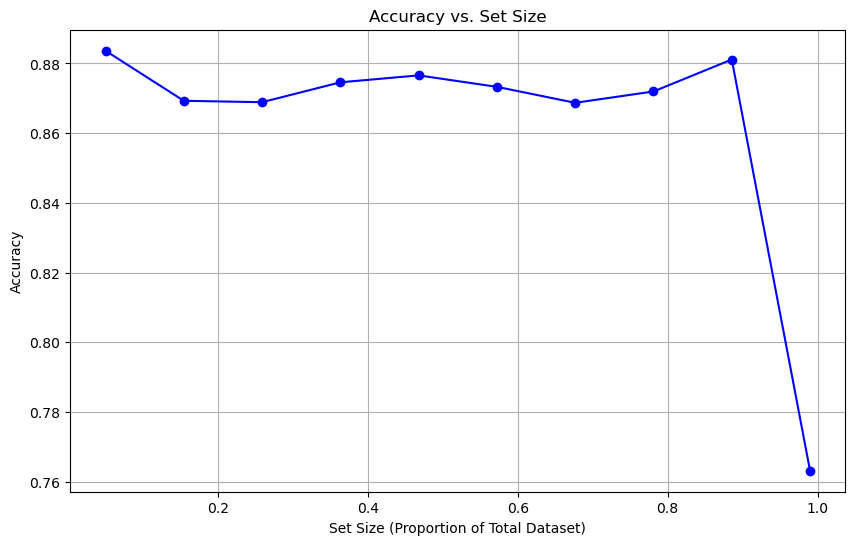

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(set_sizes, accuracies, marker='o', linestyle='-', color='b')

# Label the axes
plt.xlabel('Set Size (Proportion of Total Dataset)')
plt.ylabel('Accuracy')

# Add a title
plt.title('Accuracy vs. Set Size')

# Optionally, add grid lines for better readability
plt.grid(True)

# Display the plot
plt.show()